In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
empatica = "C:/Users/carlo/Documents/GitHub/EDA/empatica/data6.csv"
emotibit = "C:/Users/carlo/Documents/GitHub/EDA/empatica/EmotiBit1668571105.1938765.csv"

In [3]:
df_empatica = pd.read_csv(empatica)

df_emotibit = pd.read_csv(emotibit)

In [4]:
df_empatica

,System Epoch,Device,Category,E4 Epoch,Value
0,1668571112272,E4,Gsr,1.668571e+09,0.439605
1,1668571112272,E4,Gsr,1.668571e+09,0.438324
2,1668571112277,E4,Gsr,1.668571e+09,0.437043
3,1668571112277,E4,Gsr,1.668571e+09,0.431919
4,1668571112277,E4,Gsr,1.668571e+09,0.429358
...,...,...,...,...,...
2275,1668571680722,E4,Gsr,1.668572e+09,1.793850
2276,1668571680723,E4,Gsr,1.668572e+09,1.787445
2277,1668571680723,E4,Gsr,1.668572e+09,1.781041
2278,1668571680723,E4,Gsr,1.668572e+09,1.778479


Normalizing

In [5]:
df_emotibit["EDA"] = (df_emotibit["EDA"]-df_emotibit["EDA"].min()) / (df_emotibit["EDA"].max()-df_emotibit["EDA"].min())

df_empatica["Value"] = (df_empatica["Value"]-df_empatica["Value"].min()) / (df_empatica["Value"].max()-df_empatica["Value"].min())

Delta Column for Empatica Data

In [6]:
df_empatica["Delta"] = (df_empatica["E4 Epoch"] - df_empatica["System Epoch"])

Converting to timestamp and creating new column for readability and being able to align the data

In [7]:
df_empatica["Date"] = pd.to_datetime(df_empatica["System Epoch"], unit='ms')

df_emotibit["Timestamp"] = df_emotibit["Timestamp"] *1000

df_emotibit["Date"] = pd.to_datetime(df_emotibit["Timestamp"], unit='ms')

Aligning the data

In [8]:
val = df_empatica["Date"][0]

df_emotibit["Date"]=df_emotibit[df_emotibit["Date"]>=val]

df_emotibit.dropna(inplace=True)

Graphing the Data

In [9]:
Left = df_empatica["Value"].dropna()

Clipping Major Outliers

In [10]:
df_empatica = df_empatica[df_empatica.Value<5]
df_empatica = df_empatica[df_empatica.Value>=0]

In [11]:
Right = df_emotibit["EDA"]

In [12]:
df_empatica

,System Epoch,Device,Category,E4 Epoch,Value,Delta,Date
0,1668571112272,E4,Gsr,1.668571e+09,0.007530,-1.666903e+12,2022-11-16 03:58:32.272
1,1668571112272,E4,Gsr,1.668571e+09,0.006693,-1.666903e+12,2022-11-16 03:58:32.272
2,1668571112277,E4,Gsr,1.668571e+09,0.005856,-1.666903e+12,2022-11-16 03:58:32.277
3,1668571112277,E4,Gsr,1.668571e+09,0.002510,-1.666903e+12,2022-11-16 03:58:32.277
4,1668571112277,E4,Gsr,1.668571e+09,0.000837,-1.666903e+12,2022-11-16 03:58:32.277
...,...,...,...,...,...,...,...
2275,1668571680722,E4,Gsr,1.668572e+09,0.892076,-1.666903e+12,2022-11-16 04:08:00.722
2276,1668571680723,E4,Gsr,1.668572e+09,0.887893,-1.666903e+12,2022-11-16 04:08:00.723
2277,1668571680723,E4,Gsr,1.668572e+09,0.883710,-1.666903e+12,2022-11-16 04:08:00.723
2278,1668571680723,E4,Gsr,1.668572e+09,0.882036,-1.666903e+12,2022-11-16 04:08:00.723


In [13]:
df_emotibit["Date"] = pd.to_datetime(df_emotibit["Date"], unit='ms')

In [14]:
pd.set_option('display.max_rows', 500)

In [15]:
df_emotibit[['h','m','s']] = pd.DataFrame([(x.hour, x.minute, x.second) for x in df_emotibit['Date']])

# Emotibit Finger

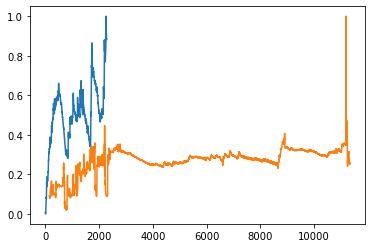

In [16]:
plt.plot(figsize=(12,6))
plt.plot(Left)
plt.plot(Right)

In [17]:
Right = Right[::5]

In [18]:
Right =Right.reset_index()

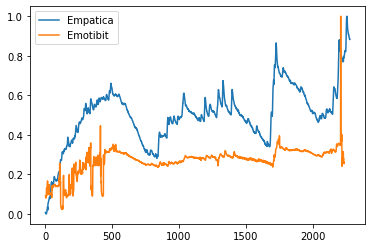

In [19]:
plt.plot(figsize=(12,6))
plt.plot(Left)
plt.plot(Right["EDA"])
plt.legend(['Empatica', 'Emotibit'])

In [20]:
mean_emotibit=df_emotibit.groupby(['m', 's']).mean()

In [21]:
df_empatica[['h','m','s']] = pd.DataFrame([(x.hour, x.minute, x.second) for x in df_empatica['Date']])

In [22]:
mean_empatica = df_empatica.groupby(['m', 's']).mean()

In [23]:
mean_emotibit.reset_index(inplace=True)
mean_empatica.reset_index(inplace=True)

In [24]:
emp = mean_empatica["Value"]
emo = mean_emotibit["EDA"]

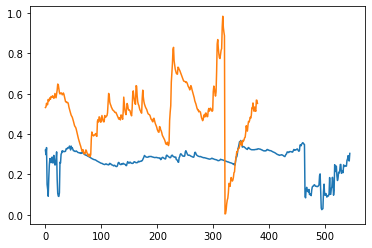

In [26]:
plt.plot(figsize=(12,6))
plt.plot(emo)
plt.plot(emp)